In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
diabetes_prediction=pd.read_csv('/content/drive/MyDrive/diabetes_dataset.csv')
diabetes_prediction.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
diabetes_prediction.shape

(100000, 9)

In [ ]:
diabetes_prediction.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
diabetes_prediction.dropna(inplace=True)

In [ ]:
diabetes_prediction.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
### Checking numerical features of the dataset
numerical= diabetes_prediction.describe()
numerical

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In this information above, the features with highest value are blood_glucose_level with a value of 300 followed by bmi with value of 95.69 and age with a value of 80. The minimum value in this dataset is 0. Blood_glucose_level has the highest std of 40.708 followed by age with a std of 22.516 and the lowest has a value of 0.1.  Blood_glucose_level has the highest mean of 138.058 and heart_disease having the lowest mean of 0.039.

<Figure size 1500x1000 with 0 Axes>

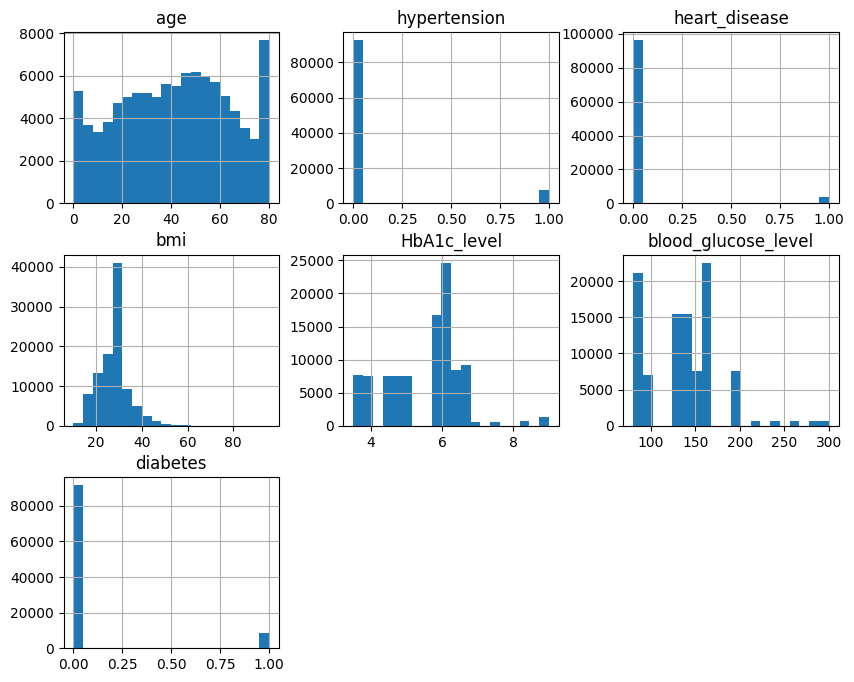

In [ ]:
## Exploring the data visually using hisograms
plt.figure(figsize=(15,10))
diabetes_prediction.hist(bins=20, figsize=(10,8))
plt.show()

From the histograms above, bmi shows a kind of normal distribution of the data. Features like hypertension,heart_disease and diabetes have only two features which is 1 and 0. Age,HbA1c_level and blood_glucose_level do not have a normal distribution.

Heart_disease has a kurtosis level of 20 and hypertension having 8 indicating that there maybe presence of some outliers. THe other features have less level of kurtosis with HbA1c_level having the lowest level of 0.21 indicating there may be absence of outliers in the features. The skewness of some features like heart_disease,hypertension and diabetes are highly positive skewed and only one feature, age is begatively skewed.

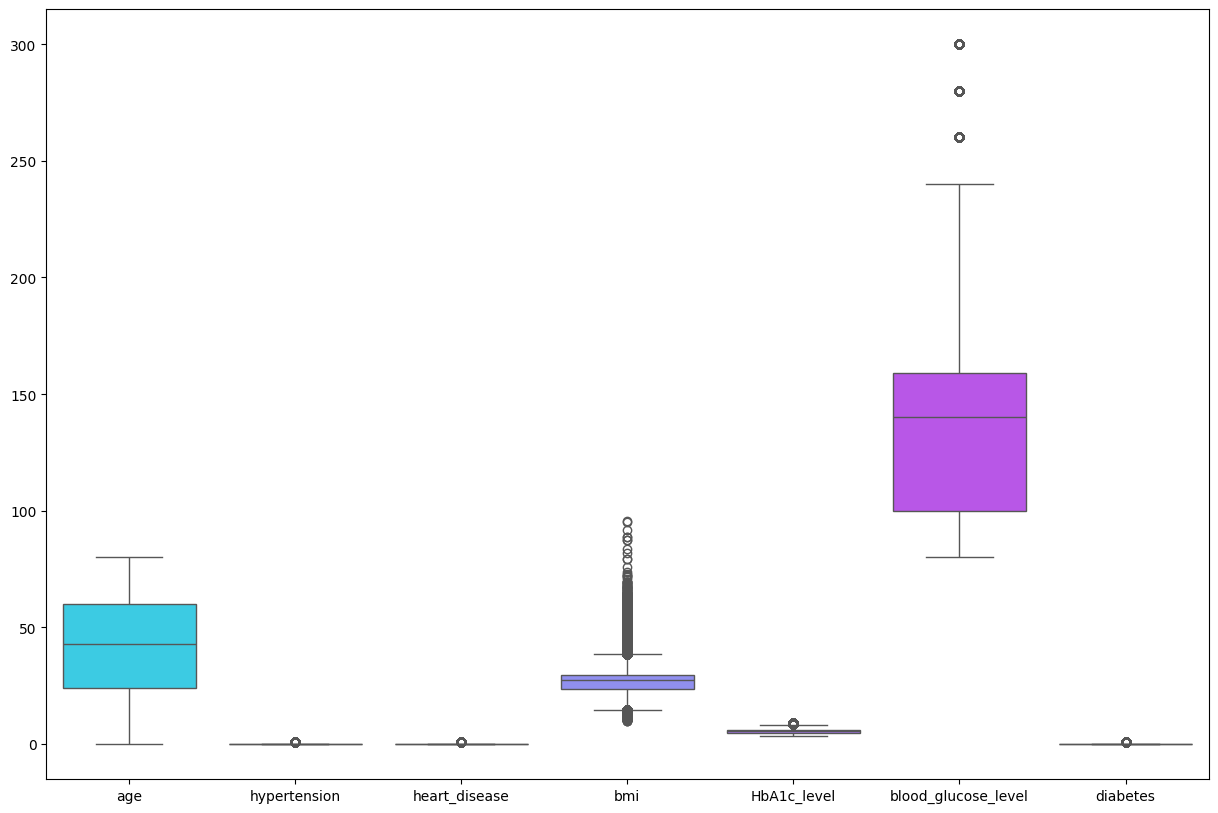

In [ ]:
# Exploring the data using boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=diabetes_prediction, palette="cool")
plt.show()

Features like blood_glucose_level and bmi contain outliers.

In [ ]:
diabetes_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


There is no null values in out data. The data contains numerical and categorical features.

In [ ]:
# Checking categorical features in the data
categorical=diabetes_prediction.describe(include=object)
categorical

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


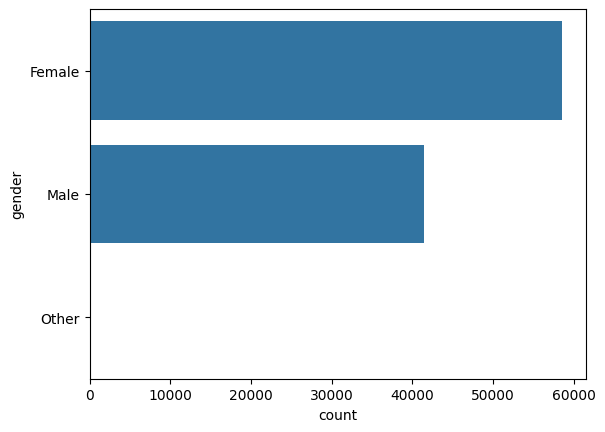

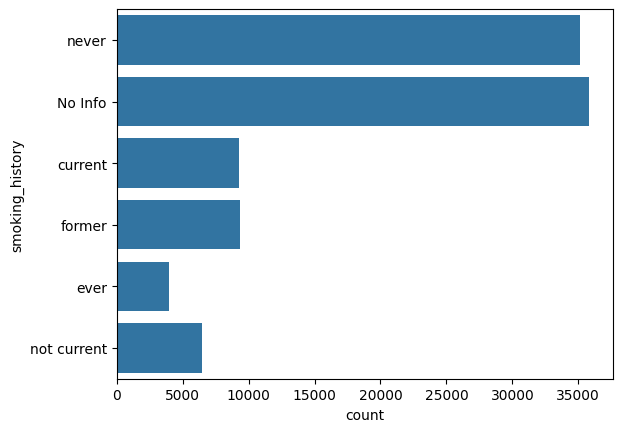

In [ ]:
## Exploring categorical features using countplot
for column in diabetes_prediction.select_dtypes(include=object):
    sns.countplot(y=column, data=diabetes_prediction)
    plt.show()

In [ ]:
print(diabetes_prediction["gender"].value_counts())
print(diabetes_prediction["smoking_history"].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [ ]:
gender={"Female":0,"Male":1,"Other":2}
smoking_history={"No Info":0,"Never":1,"former":2,"current":3,"not current":4,"ever":5}
diabetes_prediction["gender"]=diabetes_prediction["gender"].map(gender)
diabetes_prediction["smoking_history"]=diabetes_prediction["smoking_history"].map(smoking_history)

In [ ]:
diabetes_prediction.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,NaN,25.19,6.6,140,0
1,0,54.0,0,0,0.0,27.32,6.6,80,0
2,1,28.0,0,0,NaN,27.32,5.7,158,0
3,0,36.0,0,0,3.0,23.45,5.0,155,0
4,1,76.0,1,1,3.0,20.14,4.8,155,0


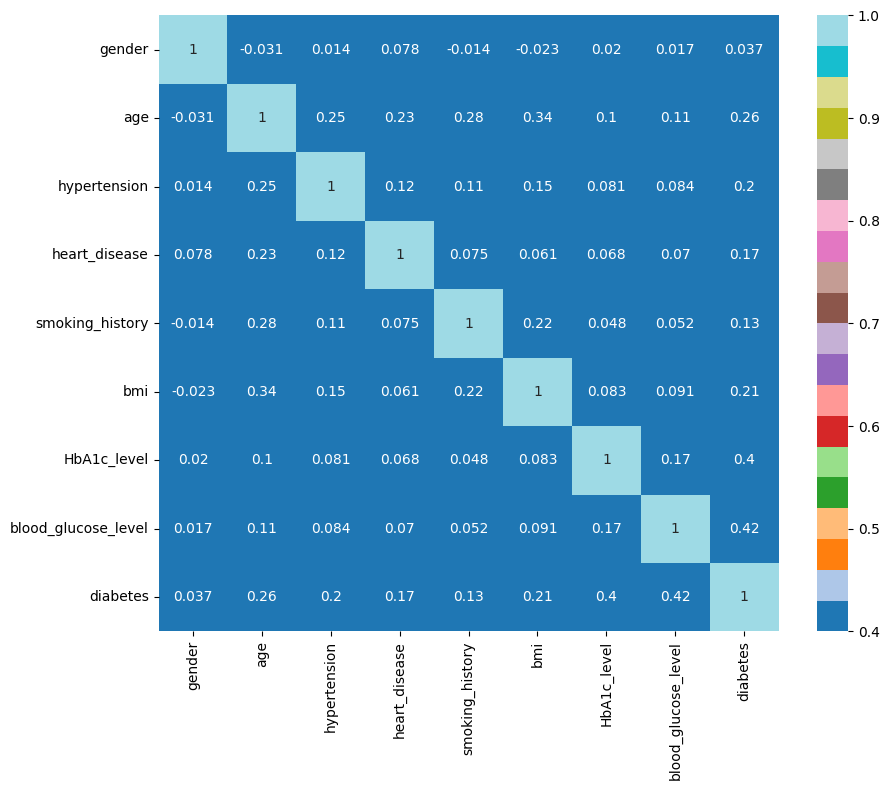

In [ ]:
## Check correlating features using a heatmap
plt.figure(figsize=(10,8))
corr=diabetes_prediction.corr()
sns.heatmap(corr,annot=True,cmap='tab20',vmin=.4)
plt.show()

There are no correlating features in the data.

In [ ]:
## Divide data into train_test split
from sklearn.model_selection import train_test_split
diabetes_prediction_filled = diabetes_prediction.fillna(diabetes_prediction.mean())

X = diabetes_prediction_filled.drop('diabetes', axis=1)
y = diabetes_prediction_filled['diabetes']

X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size=0.3,random_state=100)

In [ ]:
## Train model using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
param_grid={"max_depth":[2,4,6,8,10,12,14,16,18,20],
           "max_features":["auto","sqrt","log2"],
           "min_samples_leaf":[2,3,5,7,8,10,24,67,88],
           "min_samples_split":[6,7,9,20,43,21]
           }
dtc_grid=GridSearchCV(model,param_grid,scoring="mean_squared_error",cv=5)
dtc_grid=DecisionTreeClassifier()
dtc_grid.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

y_pred=dtc_grid.predict(X_test)

print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9523666666666667
[[26689   646]
 [  783  1882]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     27335
           1       0.74      0.71      0.72      2665

    accuracy                           0.95     30000
   macro avg       0.86      0.84      0.85     30000
weighted avg       0.95      0.95      0.95     30000



### Let's see if the model accuracy can increase if we use RandomForestClassifier algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=200,
                          criterion="gini",
                          max_depth=30,
                          max_features=14,
                          min_samples_split=5,
                          min_samples_leaf=10)

RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features=14, min_samples_leaf=10,
                       min_samples_split=5, n_estimators=200)

In [ ]:
y_pred=RFC.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9724333333333334
[[27434   789]
 [   38  1739]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28223
           1       0.69      0.98      0.81      1777

    accuracy                           0.97     30000
   macro avg       0.84      0.98      0.90     30000
weighted avg       0.98      0.97      0.97     30000



Top 4 Features:
               Feature  Importance
6          HbA1c_level    0.592336
7  blood_glucose_level    0.306046
5                  bmi    0.044408
1                  age    0.034289


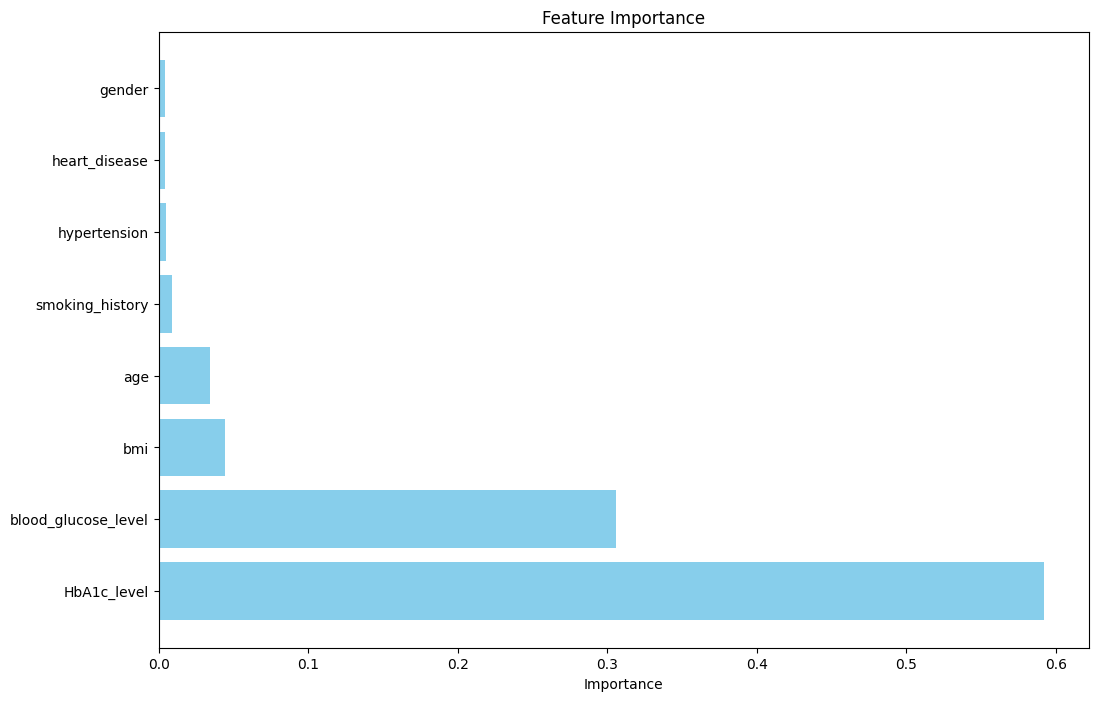

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = RFC.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 4 features
top_features = feature_importance_df.head(4)
print("Top 4 Features:")
print(top_features)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


TESTING THE MODEL USING NEW DATA


In [ ]:
import pandas as pd
# Get user input interactively for specific features
user_HbA1c_level = float(input("Enter HbA1c level: "))
user_blood_glucose_level = float(input("Enter blood glucose level: "))
user_age = float(input("Enter age: "))
user_bmi = float(input("Enter BMI: "))

# Create a dictionary with user input
user_input_data = {
    'gender': 0,  # Default or placeholder value for non-relevant features
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 0,
    'HbA1c_level': user_HbA1c_level,
    'blood_glucose_level': user_blood_glucose_level,
    'age': user_age,
    'bmi': user_bmi
}

# Convert user input data to a DataFrame with correct feature order
user_input_df = pd.DataFrame([user_input_data], columns=X.columns)

# Make predictions using the trained model (RFC)
predictions = RFC.predict(user_input_df)

# Display the prediction
if predictions[0] == 1:
    print("diabetes detected")
else:
    print(" NO diabetes detected.")


Enter HbA1c level: 5
Enter blood glucose level: 45
Enter age: 34
Enter BMI: 3
 NO diabetes detected.


In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import pandas as pd

# Function to make predictions
def make_predictions(HbA1c_level, blood_glucose_level, age, bmi):
    # Create a dictionary with user input
    user_input_data = {
        'gender': 0,  # Default or placeholder value for non-relevant features
        'hypertension': 0,
        'heart_disease': 0,
        'smoking_history': 0,
        'HbA1c_level': HbA1c_level,
        'blood_glucose_level': blood_glucose_level,
        'age': age,
        'bmi': bmi
    }

    # Convert user input data to a DataFrame with correct feature order
    user_input_df = pd.DataFrame([user_input_data], columns=X.columns)

    # Make predictions using the trained model (RFC)
    predictions = RFC.predict(user_input_df)

    # Display the prediction in Matplotlib figure
    plt.bar(['No Diabetes', 'Diabetes'], [1 - predictions[0], predictions[0]], color=['green', 'red'])
    plt.ylabel('Probability')
    plt.title('Diabetes Prediction')
    plt.show()

    # Display prediction message
    if predictions[0] == 1:
        print("Diabetes detected.")
    else:
        print("No diabetes detected.")

# Create interactive widgets
HbA1c_slider = widgets.FloatSlider(value=5.0, min=4.0, max=10.0, step=0.1, description='HbA1c level:')
blood_glucose_slider = widgets.FloatSlider(value=120, min=80, max=200, step=1, description='Blood Glucose level:')
age_slider = widgets.FloatSlider(value=40, min=20, max=80, step=1, description='Age:')
bmi_slider = widgets.FloatSlider(value=25, min=15, max=40, step=0.1, description='BMI:')

# Create interactive GUI
interact(make_predictions, HbA1c_level=HbA1c_slider, blood_glucose_level=blood_glucose_slider,
         age=age_slider, bmi=bmi_slider);


interactive(children=(FloatSlider(value=5.0, description='HbA1c level:', max=10.0, min=4.0), FloatSlider(value…

In [ ]:
import pickle

# Save the trained model
with open('diabetes_prediction_model.pkl', 'wb') as file:
    pickle.dump(RFC, file)



In [ ]:
 # Load the model
with open('diabetes_prediction_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
# Example predictions from your loaded model
predictions = loaded_model.predict(X_test)

# Map numeric predictions to labels
labels = ['No Diabetes' if pred == 0 else 'Diabetes Detected' for pred in predictions]

# Print the labels
for label in labels:
    print(label)


Streaming output truncated to the last 5000 lines.
No Diabetes
No Diabetes
No Diabetes
No Diabetes
Diabetes Detected
No Diabetes
Diabetes Detected
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
Diabetes Detected
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
Diabetes Detected
No Diabetes
No Diabetes
Diabetes Detected
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
No Diabetes
Diabetes Detected
No Diabetes
No Diabetes
N